# AGNES

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv('iris.csv')  

In [3]:
data.head() 

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.loc[data['Class'] == 'Iris-setosa','Class']=0
data.loc[data['Class'] == 'Iris-versicolor','Class']=1
data.loc[data['Class'] == 'Iris-virginica','Class']=2

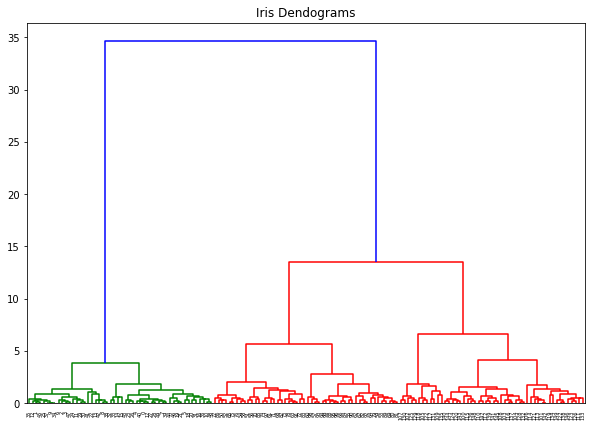

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Iris Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

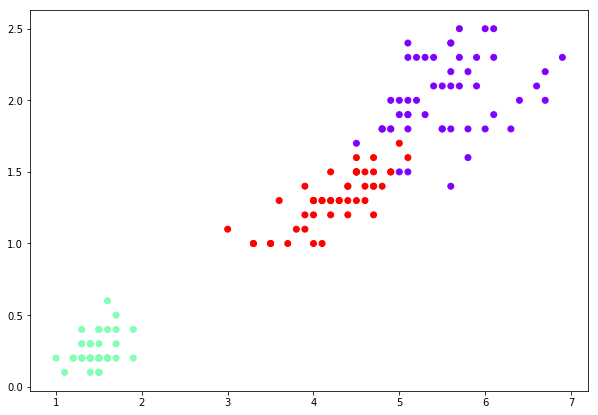

In [7]:
plt.figure(figsize=(10, 7))  
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c=cluster.labels_, cmap='rainbow')  

# KMeans

In [8]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df=pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


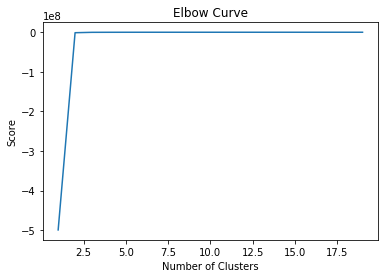

In [9]:
X= df.drop('cut', axis=1)
X= X.drop(df.columns[3], axis=1)
X= X.drop(df.columns[2], axis=1)
y= df['cut']
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [10]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
import numpy as np
correct = 0
for i in range(1,len(X)):
    predict_me = np.array((pd.DataFrame(X.iloc[i]).astype(float)))
    predict_me= predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.299412915851272


C:\Users\Sruthi Shiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


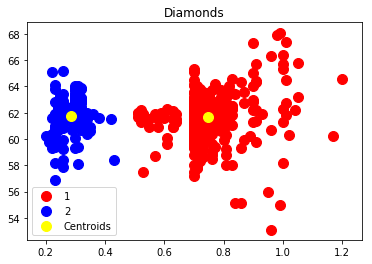

In [12]:
X = X.as_matrix(columns=None)
y_kmeans=kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Diamonds')
plt.legend()
plt.show()

# SOM

In [13]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches

import numpy as np
class SOM:

    def __init__(self, net_x_dim, net_y_dim, num_features):
        """

        :param net_x_dim: size of net (x)
        :param net_y_dim:  size of net (y)
        :param num_features: number of features in input data
        :return:
        """
        self.network_dimensions = np.array([net_x_dim, net_y_dim])
        self.init_radius = min(self.network_dimensions[0], self.network_dimensions[1])
        # initialize weight vectors
        self.num_features = num_features
        self.initialize()

    def initialize(self):
        self.net = np.random.random((self.network_dimensions[0], self.network_dimensions[1], self.num_features))

    def train(self, data, num_epochs=100, init_learning_rate=0.01, resetWeights=False):
        """
        :param data: the data to be trained
        :param num_epochs: number of epochs (default: 100)
        :param init_learning_rate: initial learning rate (default: 0.01)
        :return:
        """
        if resetWeights:
            self.initialize()
        num_rows = data.shape[0]
        indices = np.arange(num_rows)
        self.time_constant = num_epochs / np.log(self.init_radius)

        # visualization
        if self.num_features == 3:
            fig = plt.figure()
        else:
            fig = None
        # for (epoch = 1,..., Nepochs)
        for i in range(1, num_epochs + 1):
            # interpolate new values for α(t) and σ (t)
            radius = self.decay_radius(i)
            learning_rate = self.decay_learning_rate(init_learning_rate, i, num_epochs)
            # visualization
            vis_interval = int(num_epochs/10)
            if i % vis_interval == 0:
                if fig is not None:
                    self.show_plot(fig, i/vis_interval, i)
                print("SOM training epoches %d" % i)
                print("neighborhood radius ", radius)
                print("learning rate ", learning_rate)
                print("-------------------------------------")

            # shuffling data
            np.random.shuffle(indices)

            # for (record = 1,..., Nrecords)
            for record in indices:
                row_t = data[record, :]

                # find its Best Matching Unit
                bmu, bmu_idx = self.find_bmu(row_t)
                # for (k = 1,..., K)
                for x in range(self.network_dimensions[0]):
                    for y in range(self.network_dimensions[1]):
                        weight = self.net[x, y, :].reshape(1, self.num_features)
                        w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
                        # if the distance is within the current neighbourhood radius
                        if w_dist <= radius ** 2:
                            # update weight vectors wk using Eq. (3)
                            influence = SOM.calculate_influence(w_dist, radius)
                            new_w = weight + (learning_rate * influence * (row_t - weight))
                            self.net[x, y, :] = new_w.reshape(1, self.num_features)
        if fig is not None:
            plt.show()

    @staticmethod
    def calculate_influence(distance, radius):
        return np.exp(-distance / (2 * (radius ** 2)))

    def find_bmu(self, row_t):
        """
            Find the best matching unit for a given vector, row_t, in the SOM
            Returns: a (bmu, bmu_idx) tuple where bmu is the high-dimensional Best Matching Unit
                     and bmu_idx is the index of this vector in the SOM
        """
        bmu_idx = np.array([0, 0])
        # set the initial minimum distance to a huge number
        min_dist = np.iinfo(np.int).max
        # calculate the high-dimensional distance between each neuron and the input
        # for (k = 1,..., K)
        for x in range(self.network_dimensions[0]):
            for y in range(self.network_dimensions[1]):
                weight_k = self.net[x, y, :].reshape(1, self.num_features)
                # compute distances dk using Eq. (1)
                sq_dist = np.sum((weight_k - row_t) ** 2)
                # compute winning node c using Eq. (2)
                if sq_dist < min_dist:
                    min_dist = sq_dist
                    bmu_idx = np.array([x, y])
        # get vector corresponding to bmu_idx
        bmu = self.net[bmu_idx[0], bmu_idx[1], :].reshape(1, self.num_features)
        return bmu, bmu_idx

    def predict(self, data):
        # find its Best Matching Unit
        bmu, bmu_idx = self.find_bmu(data)
        return bmu, bmu_idx

    def decay_radius(self, iteration):
        return self.init_radius * np.exp(-iteration / self.time_constant)

    def decay_learning_rate(self, initial_learning_rate, iteration, num_iterations):
        return initial_learning_rate * np.exp(-iteration / num_iterations)

    def show_plot(self, fig, position, epoch):
        # setup axes
        ax = fig.add_subplot(2, 5, position, aspect="equal")
        ax.set_xlim((0, self.net.shape[0] + 1))
        ax.set_ylim((0, self.net.shape[1] + 1))
        ax.set_title('Ep: %d' % epoch)

        # plot the rectangles
        for x in range(1, self.net.shape[0] + 1):
            for y in range(1, self.net.shape[1] + 1):
                ax.add_patch(patches.Rectangle((x - 0.5, y - 0.5), 1, 1,
                                               facecolor=self.net[x - 1, y - 1, :],
                                               edgecolor='none'))


In [14]:
input_data = pd.read_csv("Wine.csv")
input_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [15]:
input_data = input_data.iloc[np.random.permutation(len(input_data))]
input_data = input_data[["Alcohol", "Malic_Acid", "Color_Intensity"]]
input_data = input_data / input_data.max()

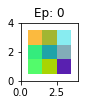

In [16]:
wine_som = SOM(3,3,3)
init_fig = plt.figure()
wine_som.show_plot(init_fig, 1, 0)
plt.show()

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighbo

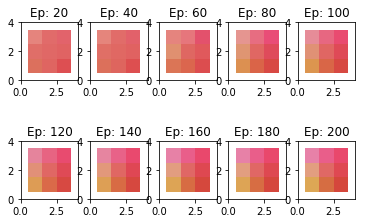

In [17]:
wine_som.train(input_data.values, num_epochs=200,init_learning_rate=0.01)